In [3]:
%load_ext autoreload
%autoreload 2

from qBNclass import qBayesNet
from qBNInference import qInference

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demo 1: 
### 3 variables, 2 states per variable 

In [4]:
bn1 = gum.fastBN("A->B<-C", 2)
bn1

(pyAgrum.BayesNet<double>@0x63caa2a2a180) BN{nodes: 3, arcs: 2, domainSize: 8, dim: 6, mem: 96o}

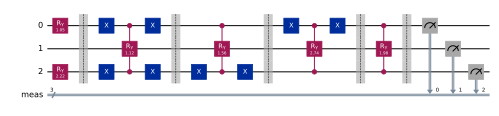

In [5]:
target_nodes_bn1 = None
qbn1 = qBayesNet(bn1, target_nodes_bn1)
qc1 = qbn1.buildCircuit(add_measure=True)
qc1.draw(output="mpl", scale=0.5)

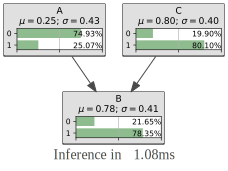

{'A': (pyAgrum.Potential<double>@0x63caa2fbede0) 
   A                |
 0        |1        |
 ---------|---------|
  0.7497  | 0.2503  |,
 'B': (pyAgrum.Potential<double>@0x63caa2ffa6a0) 
   B                |
 0        |1        |
 ---------|---------|
  0.2164  | 0.7836  |,
 'C': (pyAgrum.Potential<double>@0x63caa30779c0) 
   C                |
 0        |1        |
 ---------|---------|
  0.1966  | 0.8034  |}

In [6]:
gnb.showInference(bn1)
res1 = qbn1.runBN(optimisation_level=3, shots=100000)
res1

In [7]:
ev1 = {"A":1, "C":0}
qInf1 = qInference(qbn1)

bn1.cpt("B")

(pyAgrum.Potential<double>@0x63caa2ea6c00) 
             ||  B                |
A     |C     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.7194  | 0.2806  |
1     |0     || 0.5033  | 0.4967  |
0     |1     || 0.0401  | 0.9599  |
1     |1     || 0.2990  | 0.7010  |

In [8]:
#runtime ~ 13s
qInf1.rejectionSamplingV1(ev1, verbose=0)

{0: [0, 1.0000000000000007],
 1: [0.5150000000000003, 0.4850000000000004],
 2: [1.0000000000000007, 0]}

In [22]:
%timeit qInf.rejectionSamplingV1(ev1, verbose=0)

10.6 s ± 275 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
#runtime ~ 40s
qInf1.rejectionSampling(ev1, verbose=0)

{0: [0, 1.0000000000000007],
 1: [0.7320000000000005, 0.2680000000000002],
 2: [1.0000000000000007, 0]}

In [24]:
%timeit qInf.rejectionSampling(ev1, verbose=0)

31.9 s ± 4.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Demo 2:
### 3 variables, 5 states  per variable

In [25]:
bn2 = gum.fastBN("A->B<-C", 5)
bn2

(pyAgrum.BayesNet<double>@0x59a9aa26ae50) BN{nodes: 3, arcs: 2, domainSize: 125, dim: 108, mem: 1Ko 56o}

In [26]:
target_nodes_bn2 = None
qbn2 = qBayesNet(bn2, target_nodes_bn2)
qc2 = qbn2.buildCircuit(add_measure=True)
qc2.draw(output="mpl", scale=0.5)

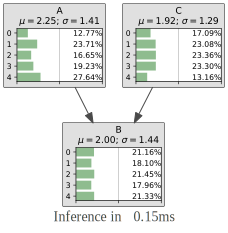

{'A': (pyAgrum.Potential<double>@0x59a9aa00bd50) 
   A                                              |
 0        |1        |2        |3        |4        |
 ---------|---------|---------|---------|---------|
  0.1283  | 0.2363  | 0.1687  | 0.1924  | 0.2744  |,
 'B': (pyAgrum.Potential<double>@0x59a9ad24bd90) 
   B                                              |
 0        |1        |2        |3        |4        |
 ---------|---------|---------|---------|---------|
  0.2124  | 0.1808  | 0.2146  | 0.1777  | 0.2144  |,
 'C': (pyAgrum.Potential<double>@0x59a9aa080e10) 
   C                                              |
 0        |1        |2        |3        |4        |
 ---------|---------|---------|---------|---------|
  0.1720  | 0.2322  | 0.2336  | 0.2313  | 0.1309  |}

In [28]:
gnb.showInference(bn2)
res2 = qbn2.runBN(optimisation_level=3, shots=100000)
res2

In [38]:
ev2 = {"A":1, "C":0}
qInf2 = qInference(qbn2)

bn2.cpt("B")

(pyAgrum.Potential<double>@0x59a9aa10dfc0) 
             ||  B                                              |
A     |C     ||0        |1        |2        |3        |4        |
------|------||---------|---------|---------|---------|---------|
0     |0     || 0.1516  | 0.2691  | 0.2515  | 0.0865  | 0.2413  |
1     |0     || 0.1197  | 0.2477  | 0.2144  | 0.2108  | 0.2074  |
2     |0     || 0.4211  | 0.0776  | 0.2461  | 0.0171  | 0.2382  |
3     |0     || 0.1445  | 0.2056  | 0.1228  | 0.3306  | 0.1965  |
4     |0     || 0.0055  | 0.4290  | 0.0186  | 0.4771  | 0.0698  |
0     |1     || 0.1897  | 0.1344  | 0.1410  | 0.2423  | 0.2926  |
[...13 more line(s) ...]
4     |3     || 0.3531  | 0.1927  | 0.2435  | 0.0874  | 0.1233  |
0     |4     || 0.1218  | 0.0403  | 0.3388  | 0.3101  | 0.1890  |
1     |4     || 0.3357  | 0.0727  | 0.2206  | 0.2754  | 0.0956  |
2     |4     || 0.2291  | 0.1229  | 0.1438  | 0.1800  | 0.3242  |
3     |4     || 0.2310  | 0.3316  | 0.1894  | 0.1484  | 0.0997  |
4     |4     || 0.0470  | 0.3071  | 0.3644  | 0.2338  | 0.0477  |

In [39]:
#runtime ~ 4m11s
qInf2.rejectionSamplingV1(ev2, verbose=0)

{0: [0, 1.0000000000000007, 0, 0, 0],
 1: [0.1470000000000001,
  0.22500000000000017,
  0.23300000000000018,
  0.18700000000000014,
  0.20800000000000016],
 2: [1.0000000000000007, 0, 0, 0, 0]}

In [1]:
#runtime ~ 40m +
#qInf2.rejectionSampling(ev2, verbose=0)

# Demo 3: (Section 4.1)
### 4 variables, 2 states  per variable

In [15]:
bn3 = gum.fastBN("IR->SM->SP<-OI", 2)
bn3.cpt("IR")[:] = [0.75, 0.25]
bn3.cpt("SM")[:] = [[0.3, 0.7], [0.8, 0.2]]
bn3.cpt("OI")[:] = [0.6,0.4]
bn3.cpt("SP")[:] = [[[0.9, 0.1], [0.5, 0.5]], [[0.4, 0.6], [0.2, 0.8]]]
bn3

(pyAgrum.BayesNet<double>@0x63caa3190130) BN{nodes: 4, arcs: 3, domainSize: 16, dim: 8, mem: 128o}

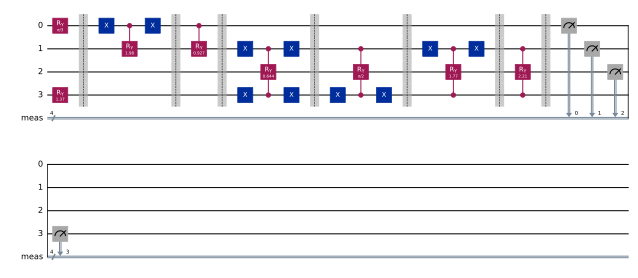

In [18]:
target_nodes_bn3 = None
qbn3 = qBayesNet(bn3, target_nodes_bn3)
qc3 = qbn3.buildCircuit(add_measure=True)
qc3.draw(output="mpl", scale=0.5)

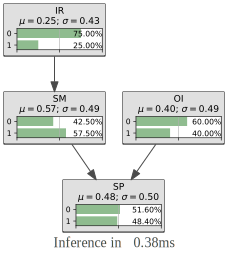

{'IR': (pyAgrum.Potential<double>@0x63caa3272240) 
   IR               |
 0        |1        |
 ---------|---------|
  0.7492  | 0.2508  |,
 'SM': (pyAgrum.Potential<double>@0x63caa3707360) 
   SM               |
 0        |1        |
 ---------|---------|
  0.4250  | 0.5750  |,
 'SP': (pyAgrum.Potential<double>@0x63caa372d4d0) 
   SP               |
 0        |1        |
 ---------|---------|
  0.5169  | 0.4831  |,
 'OI': (pyAgrum.Potential<double>@0x63caa36b37c0) 
   OI               |
 0        |1        |
 ---------|---------|
  0.5998  | 0.4002  |}

In [19]:
gnb.showInference(bn3)
res3 = qbn3.runBN(optimisation_level=3, shots=100000)
res3

In [21]:
ev3 = {"SM": 0, "OI": 0}
qInf3 = qInference(qbn3)

bn3.cpt("SP")

(pyAgrum.Potential<double>@0x63caa30fdf80) 
             ||  SP               |
SM    |OI    ||0        |1        |
------|------||---------|---------|
0     |0     || 0.9000  | 0.1000  |
1     |0     || 0.5000  | 0.5000  |
0     |1     || 0.4000  | 0.6000  |
1     |1     || 0.2000  | 0.8000  |

In [22]:
#runtime ~ 9s
qInf3.rejectionSamplingV1(ev3, verbose=0)

{0: [0.4980000000000004, 0.5020000000000003],
 1: [1.0000000000000007, 0],
 2: [0.9020000000000007, 0.09800000000000007],
 3: [1.0000000000000007, 0]}

# Demo 4: (Section 4.2)
### 10 variables, 2 states  per variable

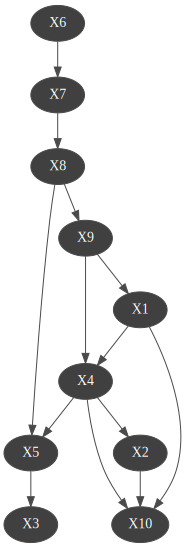

In [35]:
bn4 = gum.fastBN("X6->X7->X8->X5->X3; X8->X9->X1->X10; X9->X4<-X1; X5<-X4->X10; X4->X2->X10", 2)
bn4.cpt("X6")[:] = [0.98, 0.02]
bn4.cpt("X7")[:] = [[0.988, 0.012], [0.429, 0.571]]
bn4.cpt("X8")[:] = [[0.006,0.994], [0.875, 0.125]]
bn4.cpt("X9")[:] = [[0, 1], [0.982, 0.018]]
bn4.cpt("X1")[:] = [[0.448, 0.552], [0.067, 0.933]]
bn4.cpt("X4")[:] = [[[0.151, 0.849], [0.874, 0.126]], [[1, 0], [1, 0]]]
bn4.cpt("X2")[:] = [[0.76, 0.24], [1, 0]]
bn4.cpt("X5")[:] = [[[0, 1], [0, 1]], [[0.723, 0.277], [0.311, 0.689]]]
bn4.cpt("X3")[:] = [[1, 0], [0.949, 0.051]]
bn4.cpt("X10")[:] = [[[[0.684, 0.316], [0, 1]], [[0, 1], [0.474, 0.526]]], [[[1, 0], [0, 1]], [[0.481, 0.519], [1, 0]]]]

gnb.showBN(bn3, size=10)

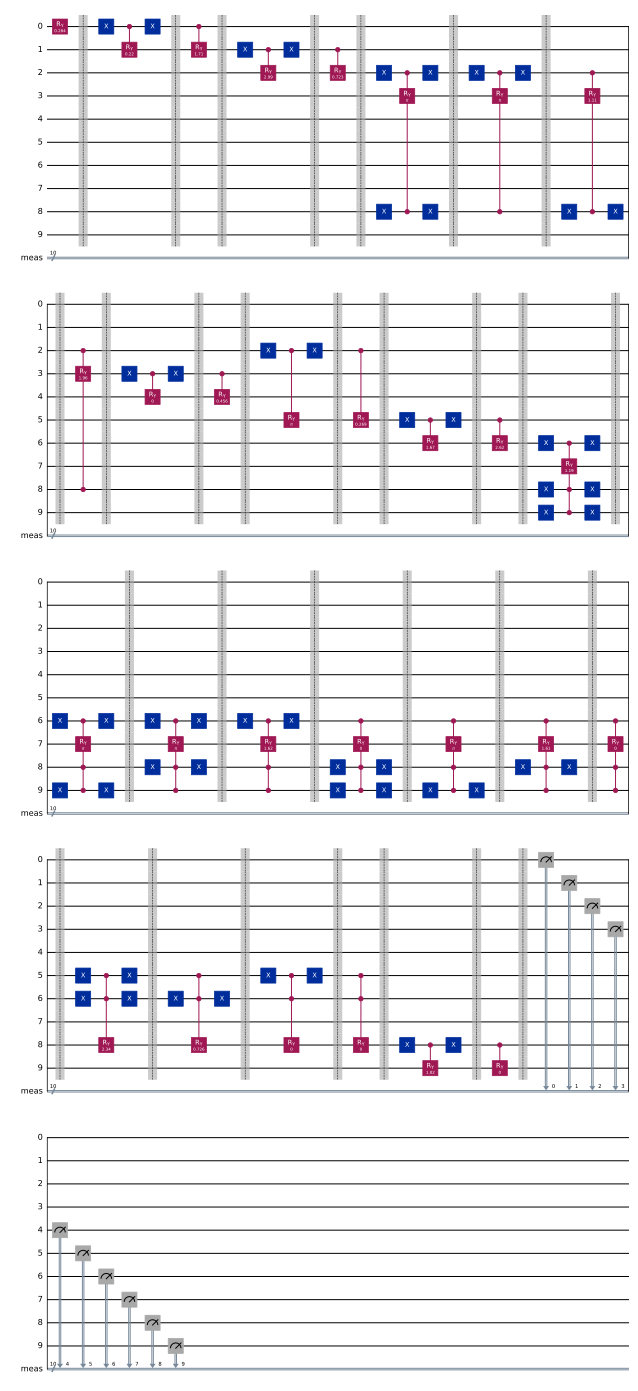

In [36]:
target_nodes_bn4 = None
qbn4 = qBayesNet(bn4, target_nodes_bn4)
qc4 = qbn4.buildCircuit(add_measure=True)
qc4.draw(output="mpl", scale=0.5)

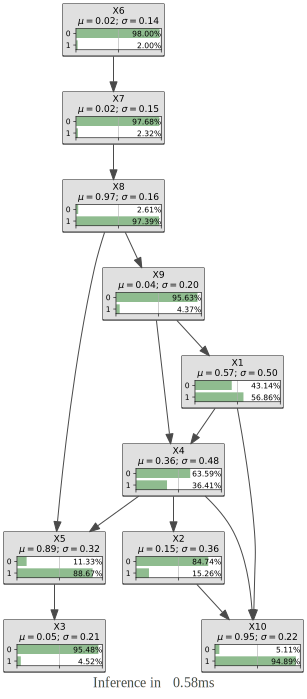

{'X6': (pyAgrum.Potential<double>@0x63caa407ac90) 
   X6               |
 0        |1        |
 ---------|---------|
  0.9794  | 0.0206  |,
 'X7': (pyAgrum.Potential<double>@0x63caa3f0c290) 
   X7               |
 0        |1        |
 ---------|---------|
  0.9768  | 0.0232  |,
 'X8': (pyAgrum.Potential<double>@0x63caa3e7f7d0) 
   X8               |
 0        |1        |
 ---------|---------|
  0.0262  | 0.9738  |,
 'X5': (pyAgrum.Potential<double>@0x63caa4186860) 
   X5               |
 0        |1        |
 ---------|---------|
  0.7059  | 0.2941  |,
 'X3': (pyAgrum.Potential<double>@0x63caa303a770) 
   X3               |
 0        |1        |
 ---------|---------|
  0.9851  | 0.0149  |,
 'X9': (pyAgrum.Potential<double>@0x63caa30ff200) 
   X9               |
 0        |1        |
 ---------|---------|
  0.9571  | 0.0429  |,
 'X1': (pyAgrum.Potential<double>@0x63caa31480f0) 
   X1               |
 0        |1        |
 ---------|---------|
  0.4329  | 0.5671  |,
 'X10': (pyAgrum.Pot

In [39]:
gnb.showInference(bn4, size=10)
res4 = qbn4.runBN(optimisation_level=3, shots=100000)
res4

In [42]:
qbn4.aerSimulation(qc4, shots=100000)

{'X6': [0.98015, 0.01985],
 'X7': [0.97668, 0.02332],
 'X8': [0.02629, 0.97371],
 'X5': [0.70541, 0.29459],
 'X3': [0.98542, 0.01458],
 'X9': [0.95594, 0.04406],
 'X1': [0.43069, 0.56931],
 'X10': [0.86353, 0.13647],
 'X4': [0.6359, 0.3641],
 'X2': [0.84593, 0.15407]}

In [43]:
ev4 = {"X4": 0, "X2": 0, "X1": 0}
qInf4 = qInference(qbn4)

bn4.cpt("X10")

(pyAgrum.Potential<double>@0x63caa3179490) 
                    ||  X10              |
X1    |X4    |X2    ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.6840  | 0.3160  |
1     |0     |0     || 0.0000  | 1.0000  |
0     |1     |0     || 0.0000  | 1.0000  |
1     |1     |0     || 0.4740  | 0.5260  |
0     |0     |1     || 1.0000  | 0.0000  |
1     |0     |1     || 0.0000  | 1.0000  |
0     |1     |1     || 0.4810  | 0.5190  |
1     |1     |1     || 1.0000  | 0.0000  |

In [46]:
bn4.nodeId(bn4.variable("X10"))

7

In [44]:
#runtime ~ 3m24s
qInf4.rejectionSamplingV1(ev4, verbose=0)

{0: [0.9820000000000008, 0.01800000000000001],
 1: [0.9790000000000008, 0.02100000000000001],
 2: [0.027000000000000017, 0.9730000000000008],
 3: [0.6930000000000005, 0.3070000000000002],
 4: [0.9880000000000008, 0.012000000000000004],
 5: [0.9560000000000007, 0.04400000000000003],
 6: [1.0000000000000007, 0],
 7: [0.6950000000000005, 0.3050000000000002],
 8: [1.0000000000000007, 0],
 9: [1.0000000000000007, 0]}

# Demo 5:
### Demo 4 with nodes X2, X4, X1, X10

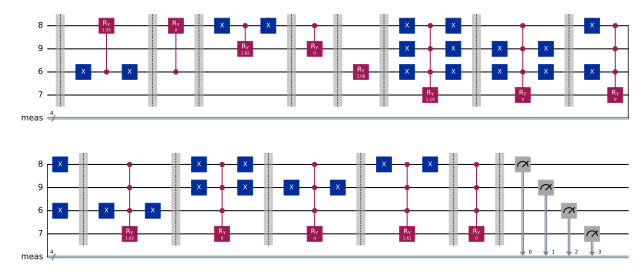

In [49]:
target_nodes_bn5 = {"X2", "X4", "X1", "X10"}
qbn5 = qBayesNet(bn4, target_nodes_bn5)
qc5 = qbn5.buildCircuit(add_measure=True)
qc5.draw(output="mpl", scale=0.5)

In [53]:
qInf5 = qInference(qbn5)
bn4.cpt("X10")

(pyAgrum.Potential<double>@0x63caa3179490) 
                    ||  X10              |
X1    |X4    |X2    ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.6840  | 0.3160  |
1     |0     |0     || 0.0000  | 1.0000  |
0     |1     |0     || 0.0000  | 1.0000  |
1     |1     |0     || 0.4740  | 0.5260  |
0     |0     |1     || 1.0000  | 0.0000  |
1     |0     |1     || 0.0000  | 1.0000  |
0     |1     |1     || 0.4810  | 0.5190  |
1     |1     |1     || 1.0000  | 0.0000  |

In [55]:
#runtime ~ 11s
qInf5.rejectionSamplingV1(ev4, verbose=0)

{8: [1.0000000000000007, 0],
 9: [1.0000000000000007, 0],
 6: [1.0000000000000007, 0],
 7: [0.6880000000000005, 0.3120000000000002]}